In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [16]:
import os
import configparser

config = configparser.ConfigParser(interpolation=configparser.ExtendedInterpolation(), allow_no_value=True)
config.read('config.ini')

df = pd.read_csv(os.path.join(config['PATHS']['apk_dir'], 'data.csv'))

In [17]:
import numpy as np
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
X = df[map(str, list(range(1, 10)))]
#df[['str_len','str_val','method_len','class_fields','class_methods','classes_dex']]
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans

df

c:\Users\gschi\miniconda3\envs\onr-android-malware\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gschi\miniconda3\envs\onr-android-malware\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,1,2,3,4,5,6,7,8,9,malign,Cluster
0,0.297287,0.195349,0.135659,0.104651,0.076357,0.059302,0.053876,0.037984,0.037597,0,0
1,0.285026,0.189829,0.152005,0.121972,0.076215,0.058932,0.044766,0.034707,0.035274,0,0
2,0.275931,0.188190,0.147962,0.126405,0.082902,0.057924,0.044628,0.038322,0.036954,0,0
3,0.323753,0.147680,0.116517,0.096260,0.084314,0.074965,0.052632,0.054363,0.047957,0,0
4,0.281341,0.210776,0.132864,0.109368,0.074621,0.060921,0.047375,0.039109,0.042783,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,0.259003,0.150469,0.180562,0.143562,0.074988,0.059201,0.051307,0.040454,0.037494,1,0
196,0.364347,0.158381,0.101562,0.092330,0.071733,0.051847,0.058949,0.053267,0.044034,1,0
197,0.282683,0.235665,0.136181,0.094897,0.063933,0.053326,0.046732,0.042718,0.040998,1,0
198,0.337884,0.210242,0.132588,0.083781,0.054576,0.044220,0.045474,0.045546,0.044901,1,0


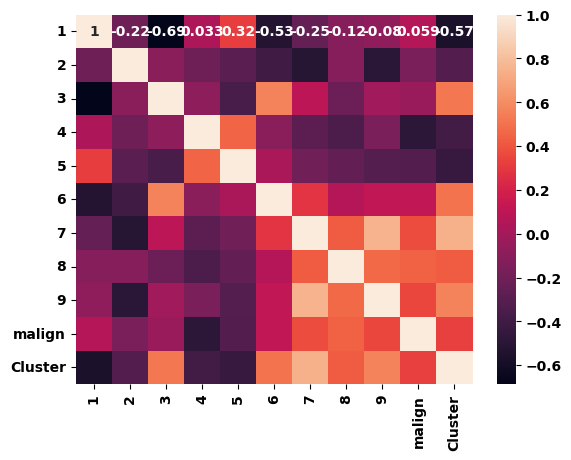

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(df.corr(), annot=True)
plt.show()

In [22]:
#X = df[['str_len','str_val','method_len','class_fields','class_methods','classes_dex']]
X = df[['1', '2', '3', '4', '5', '6', '7', '8', '9']]
y = df['malign']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification report:\n", report)

Accuracy: 0.675
Classification report:
               precision    recall  f1-score   support

           0       0.61      0.95      0.75        20
           1       0.89      0.40      0.55        20

    accuracy                           0.68        40
   macro avg       0.75      0.68      0.65        40
weighted avg       0.75      0.68      0.65        40

